<a href="https://colab.research.google.com/github/jaaaamj0711/kaggle_study/blob/master/kaggle_survey/kaggle_survey_Company_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📝 kaggle survey 2020 (Company of the Kaggler)

## 💻 분석을 통한 인사이트 찾기

#### Q20 What is the size of the company where you are employed?

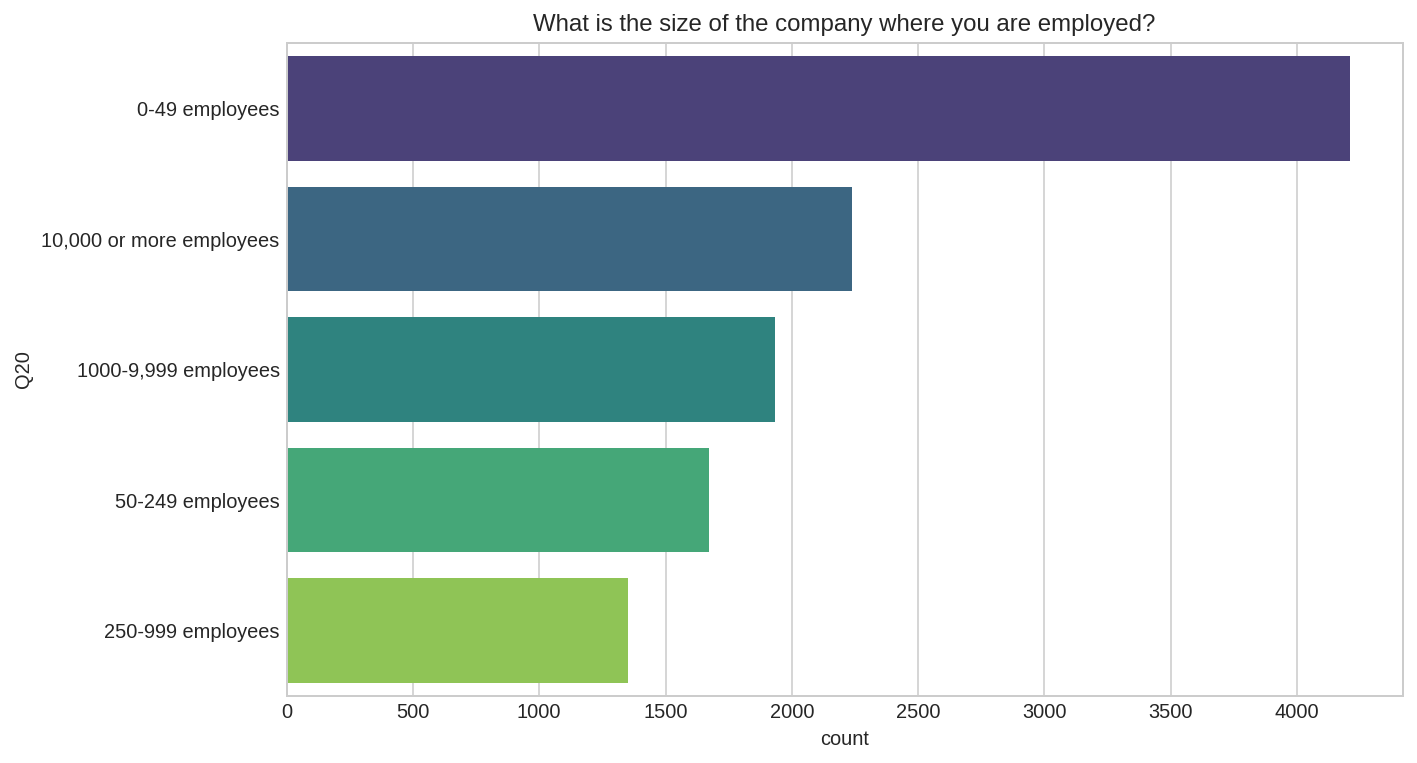

In [16]:
plot_by_qno("Q20")

Q20은 캐글 사용자들이 고용되고 있는 회사 규모에 관한 질문입니다.  

50명 미만의 사원들이 있는 회사를 다니고 있는 사람들이 많았습니다.

#### Q21 Approximately how many individuals are responsible for data science workloads at your place of business?

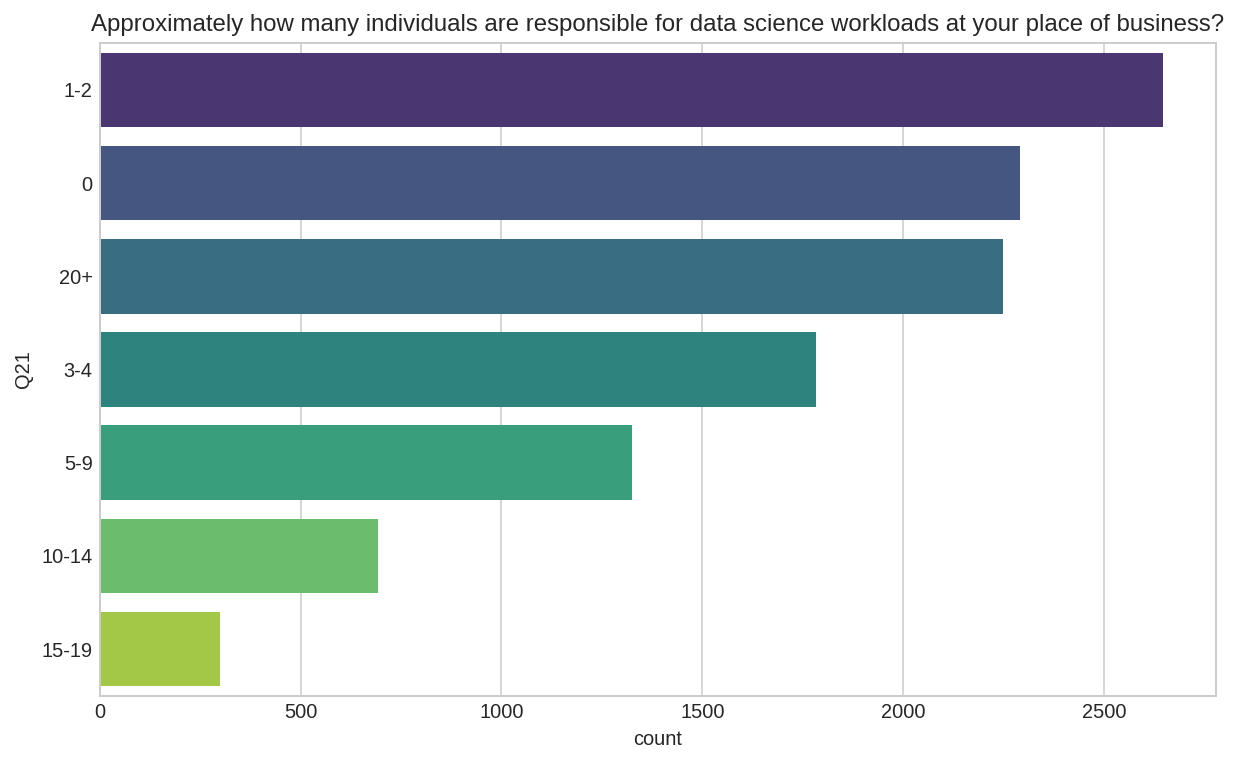

In [17]:
plot_by_qno("Q21")

Q21은 현업에서 데이터 과학과 관련된 일을 하는 사람들에 수에 관한 질문입니다.  

1~2명 정도 그리고 0명도 많다는 결과가 나왔습니다.  

데이터 과학이 이슈가 많이 되고 있는 시대인데 생각보다 적은 결과가 나왔다고 생각을 하였습니다. 그런데 3위에 20명이상이 있는것으로 보아 회사별로 차이가 존재할 것 같다는 생각을 하였습니다.

#### Q22 Does your current employer incorporate machine learning methods into their business?

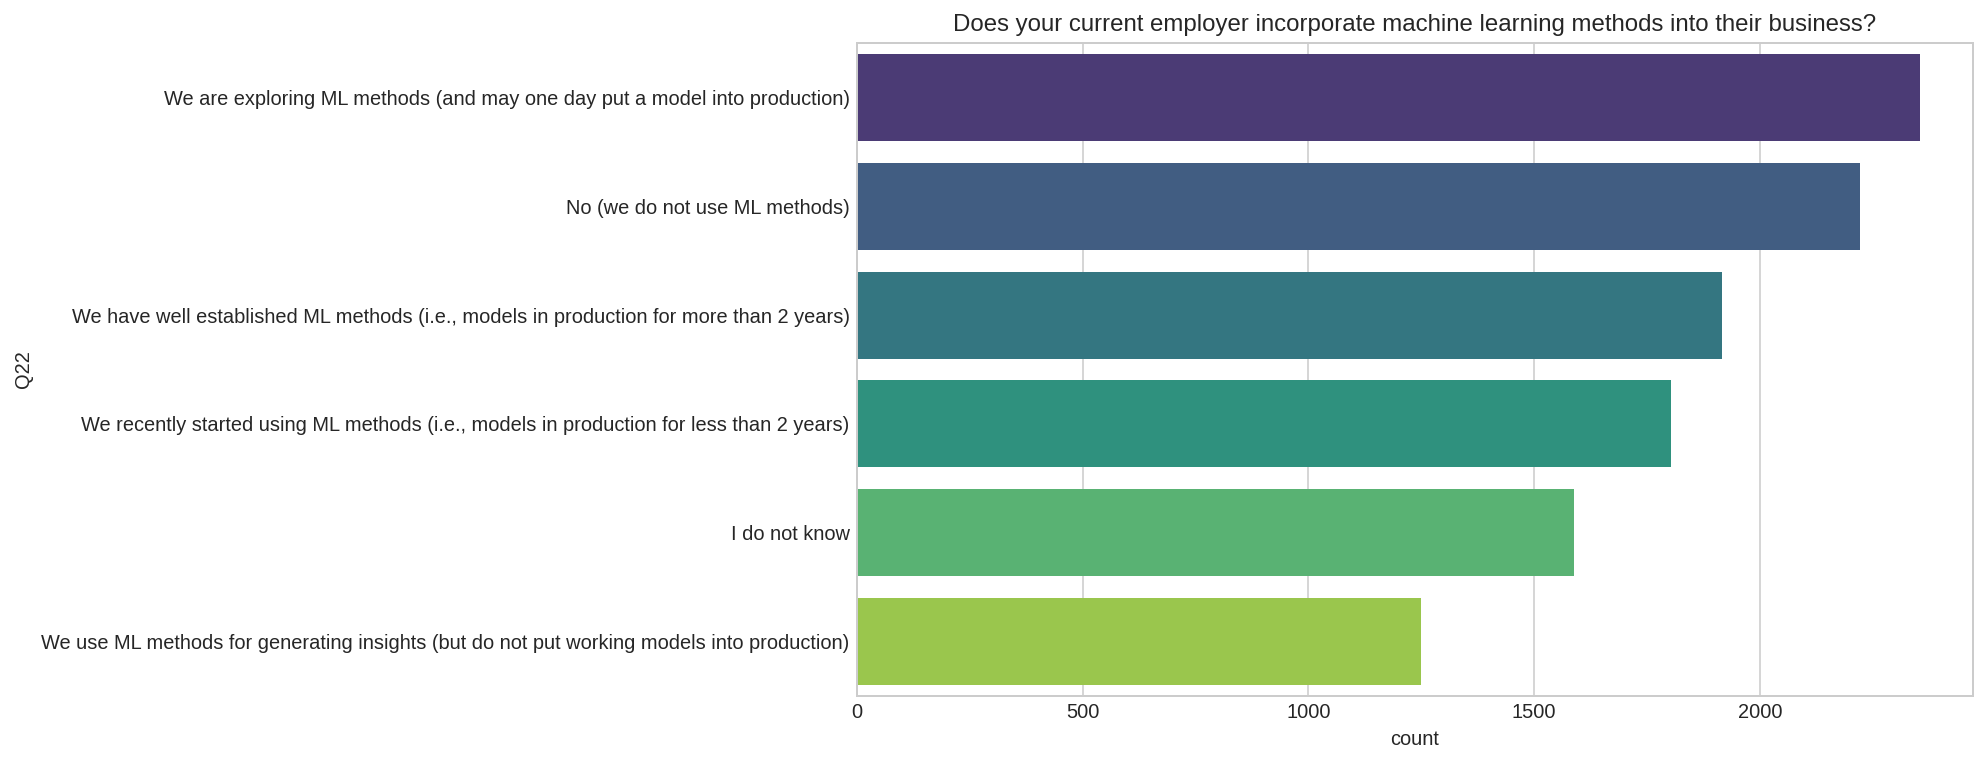

In [18]:
plot_by_qno("Q22")

Q22는 실제로 비즈니스에 머신러닝을 사용하는지에 관한 질문입니다.  

탐색중이다는 결과가 제일 많았고, 다음으론 사용하지 않고 있다는 결과가 많았습니다. 아직까지는 주로 사용하지 않는 회사가 많은 것 같습니다. 

#### Q23 Select any activities that make up an important part of your role at work: (Select all that apply) 

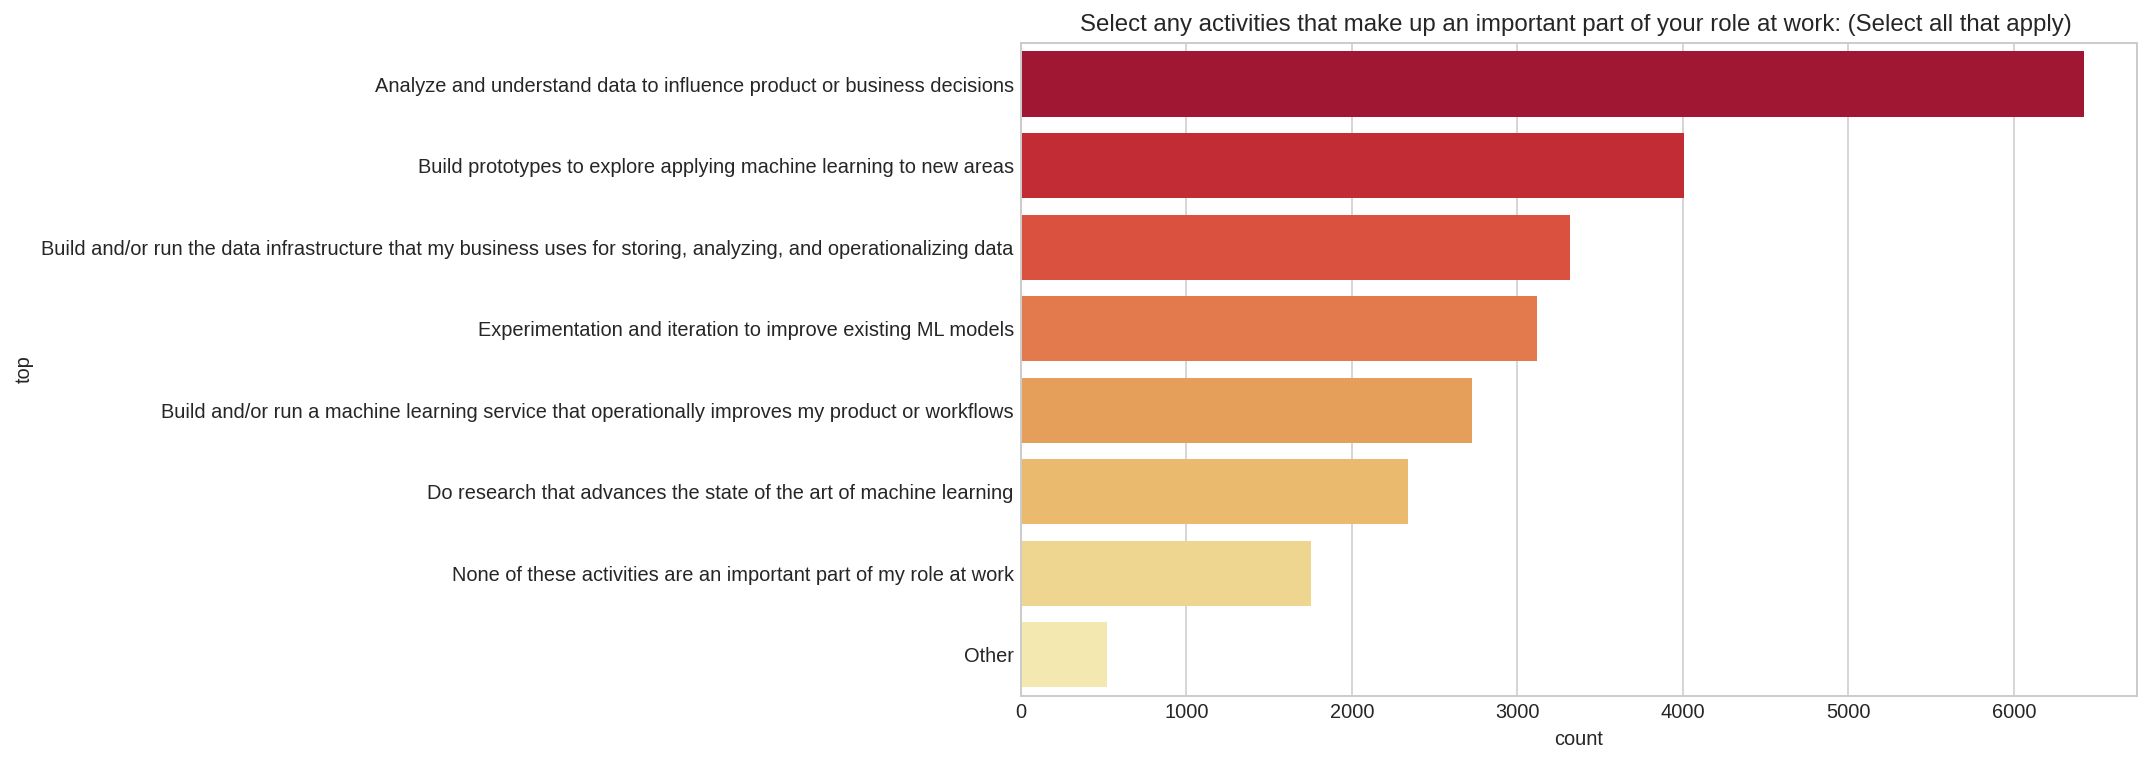

In [19]:
plot_by_qno("Q23")

Q23은 회사에서 담당하고 있는 역할 중 가장 중요한 부분에 관한 질문입니다.  

상위권에는 비즈니스 의사 결정을 위한 분석및 이해, 머신러닝을 적용하기 위한 프로토타입을 만든다 등이 있었습니다.

#### Q24 What is your current yearly compensation (approximate $USD)?

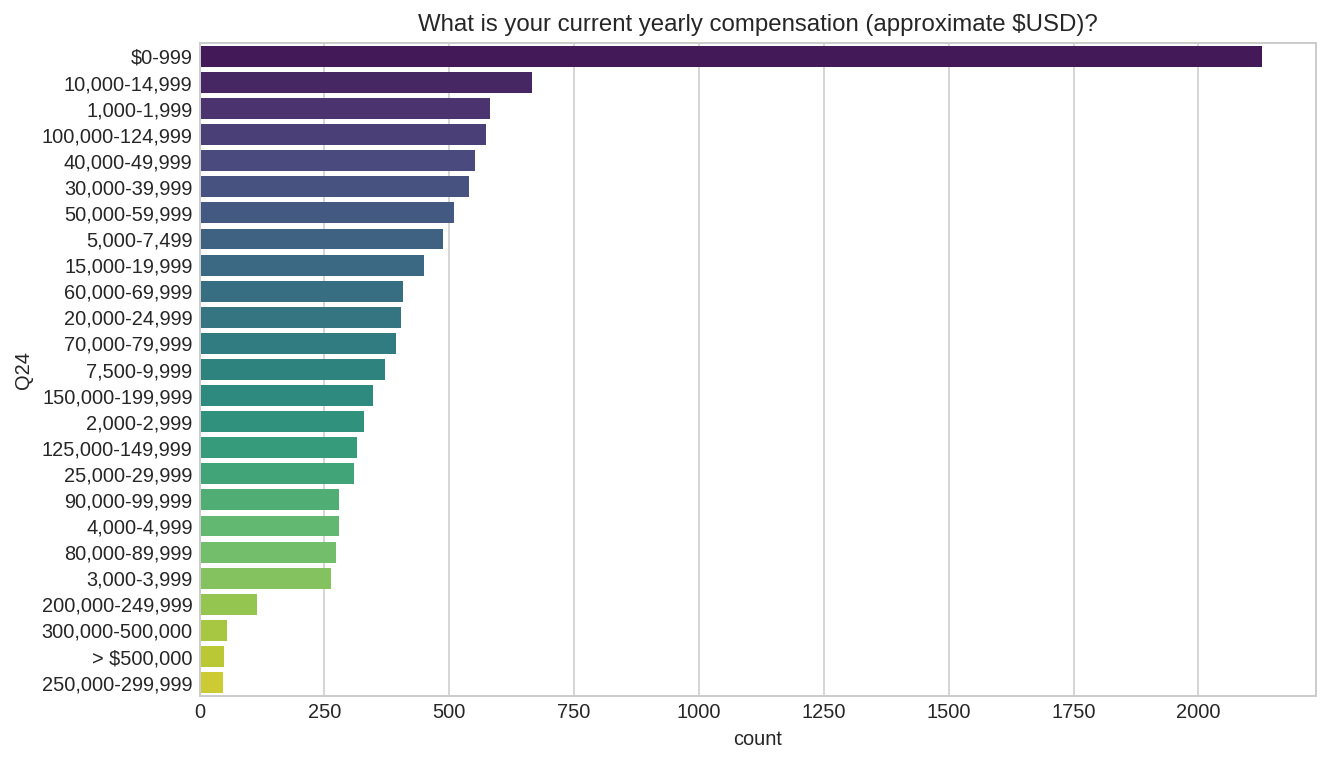

In [20]:
plot_by_qno("Q24")

Q24는 빈도수에 따라 정렬을 하는 것 보다 금액순으로 정렬을 하면 더 보기 좋은 시각화가 될것 같습니다.  

따라서 몇가지 작업을 진행하도록 하겠습니다.

In [21]:
q24_count = answer["Q24"].value_counts().reset_index()
q24_count.columns = ["range", "count"]
q24_count

,range,count
0,$0-999,2128
1,"10,000-14,999",665
2,"1,000-1,999",581
3,"100,000-124,999",573
4,"40,000-49,999",552
5,"30,000-39,999",540
6,"50,000-59,999",510
7,"5,000-7,499",488
8,"15,000-19,999",449
9,"60,000-69,999",408


먼저 다음과 같이 빈도수 테이블을 만들어 줍니다.

In [22]:
q24_count["min"] = q24_count["range"].str.split("-", expand=True)[0]
q24_count["max"] = q24_count["range"].str.split("-", expand=True)[1]
q24_count["min"] = q24_count["min"].str.replace(",|\$|>", "").astype(int)
q24_count = q24_count.sort_values("min")
q24_count

,range,count,min,max
0,$0-999,2128,0,999
2,"1,000-1,999",581,1000,"1,999"
14,"2,000-2,999",330,2000,"2,999"
20,"3,000-3,999",264,3000,"3,999"
18,"4,000-4,999",279,4000,"4,999"
7,"5,000-7,499",488,5000,"7,499"
12,"7,500-9,999",371,7500,"9,999"
1,"10,000-14,999",665,10000,"14,999"
8,"15,000-19,999",449,15000,"19,999"
10,"20,000-24,999",404,20000,"24,999"


range 변수를 - 를 기준으로 앞, 뒤를 구분하여 앞에 값을 기준으로 정렬을 하면 값이 작은 순서로 정렬을 할 수 있습니다.

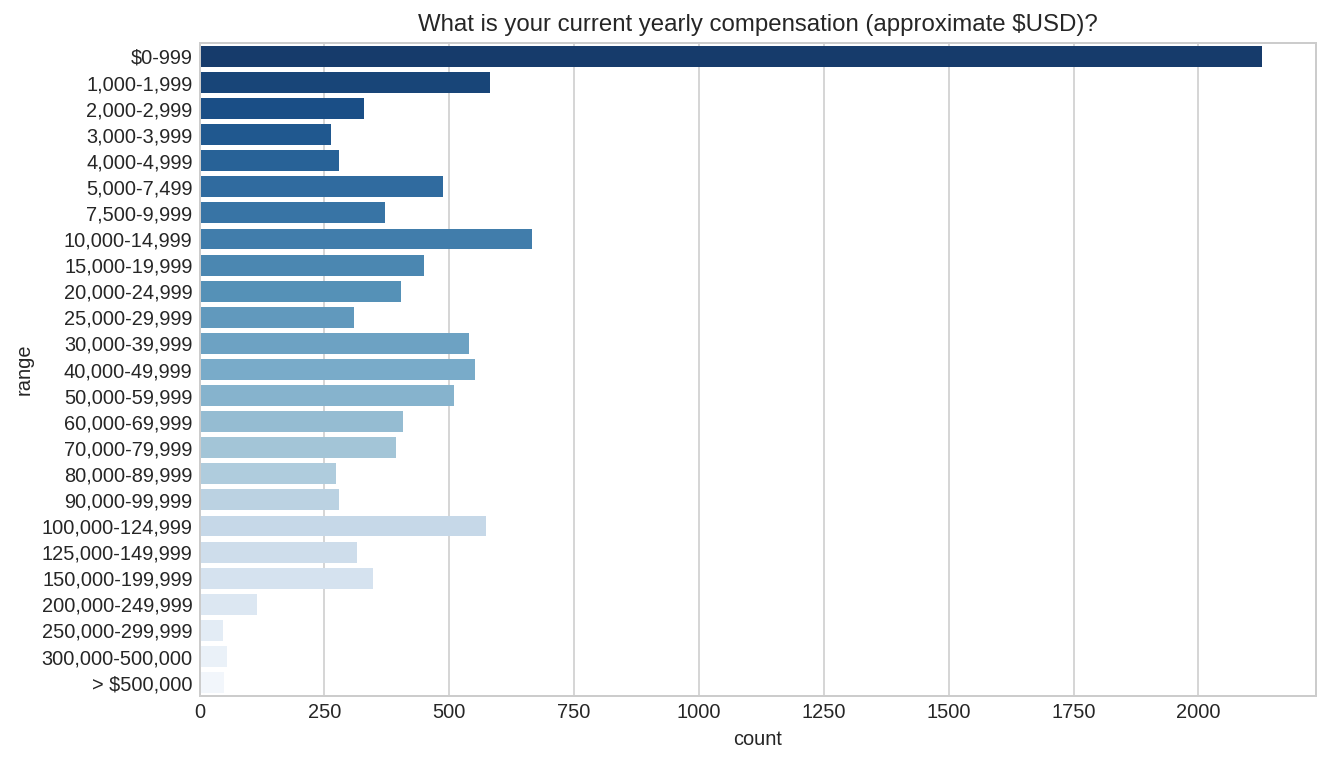

In [23]:
plt.figure(figsize=(10, 6))
g = sns.barplot(data=q24_count, 
                y="range", x="count", 
                palette="Blues_r").set_title(question_title_qno("Q24"))

Q24는 캐글 사용자들의 연봉에 관한 질문입니다.  

분석 결과 0~999$ 사이가 가장 많았습니다. 학생들이 많이 존재해서 이러한 결과가 나왔을 것이라고 예상해볼 수 있습니다.  

한번 한국만 필터링을 해서 분석 결과를 보도록 하겠습니다.

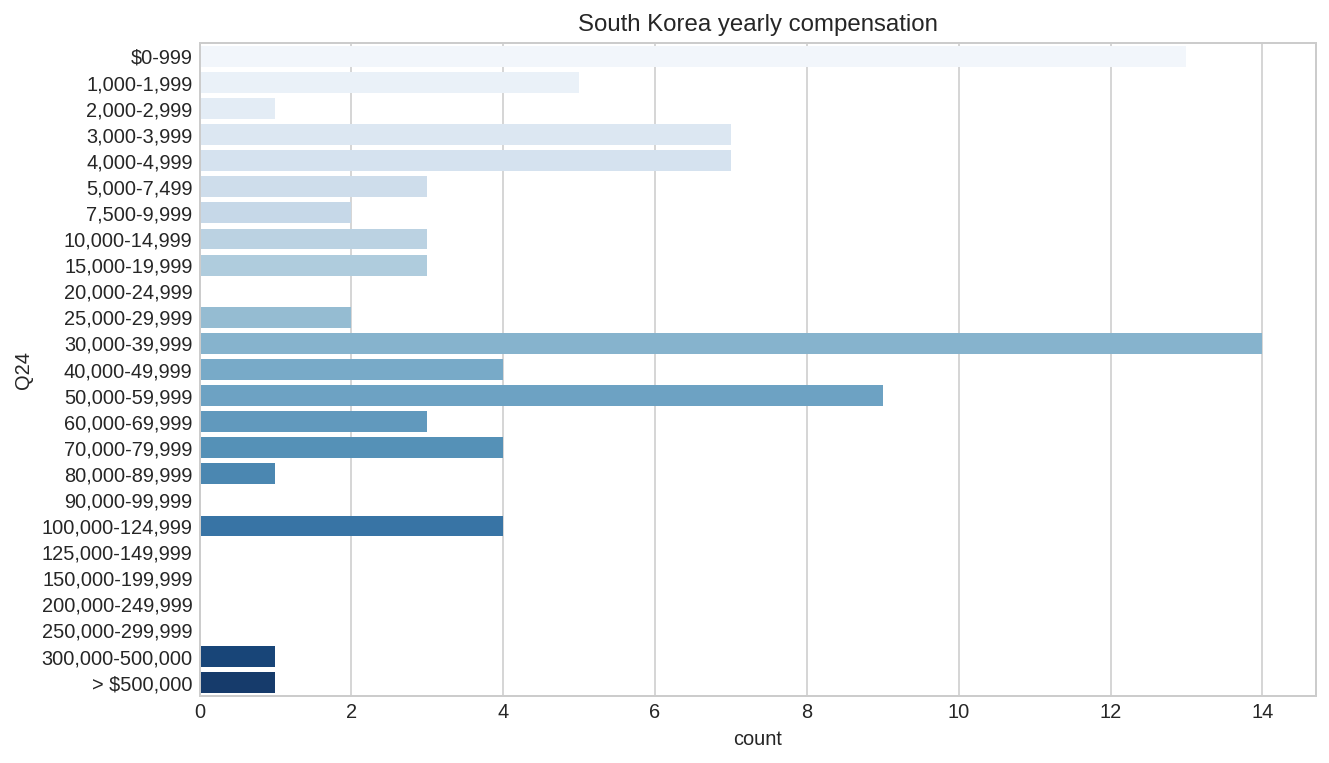

In [24]:
q24_cols = q24_count.range.tolist()
q3_south_korea = answer[answer["Q3"].isin(["South Korea"])]
plt.figure(figsize=(10, 6))
g = sns.countplot(data=q3_south_korea, 
                  y="Q24", 
                  order=q24_cols, 
                  palette="Blues").set_title("South Korea yearly compensation")

한국만 필터링을 하니 조금 다른 결과가 나왔습니다. 30,000~39,999 사이에 해당하는 월급을 가장 많이 받는다는 결과가 나왔습니다. 다음으로는 역시 학생들이 많아 0-999 $ 가 많은 결과가 나왔습니다. 그런데 그래프의 밑을 보면 500,000 $ 이상도 받는 사람들이 있었습니다. 그래프를 보니 한명정도 있는것 같습니다!!

#### Q25 Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?

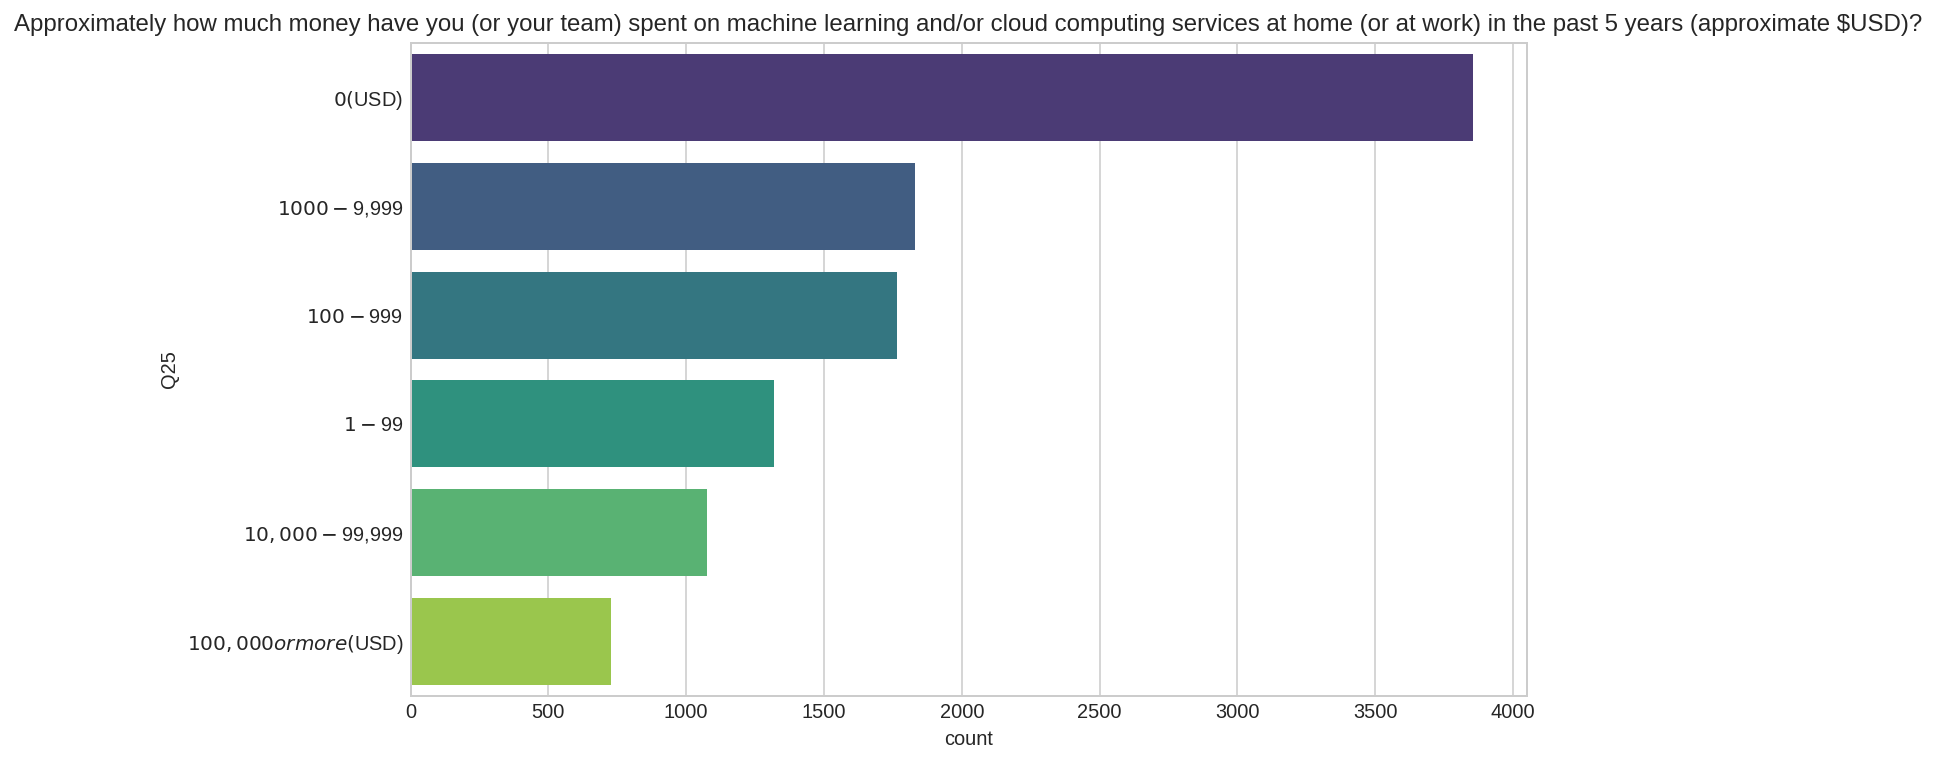

In [25]:
plot_by_qno("Q25")

지난 5년동안 개인이나 팀에서 머신러닝 및 클라우드 컴퓨팅 서비스에 지출한 비용은 얼만지에 관한 질문입니다.  

 

돈을 지불하지 않은 사람들이 많았습니다. 